In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import BallTree
from scipy import stats
from scipy.stats import ttest_ind
# 读取数据
df = pd.read_csv('cleaned_charging_station_data.csv')

# 查看数据结构
print(df.head())
print(df.info())


C:\Users\colin\AppData\Local\Temp\ipykernel_28160\373562421.py:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_charging_station_data.csv')


   city_id station_name  connector_id  coordinates_x  coordinates_y  \
0       80        50035             1       -4.61764       57.21494   
1       80        50035             1       -4.61764       57.21494   
2       80        50035             1       -4.61764       57.21494   
3       80        50035             1       -4.61764       57.21494   
4       80        50035             1       -4.61764       57.21494   

   tariff_amount  tariff_connectionfee  max_chargerate  is_available  hour  \
0           0.75                   1.5               7             0     1   
1           0.75                   1.5               7             0     2   
2           0.75                   1.5               7             0     3   
3           0.75                   1.5               7             0     4   
4           0.75                   1.5               7             0     5   

   ...  city_density_level  station_connector_count  \
0  ...                   1                       

In [12]:
# 按小时聚合数据，计算每个小时的平均可用性
hourly_availability = df.groupby('hour')['is_available'].mean().reset_index()

# 查看聚合结果
print(hourly_availability)


    hour  is_available
0      0      0.748924
1      1      0.749952
2      2      0.754275
3      3      0.759377
4      4      0.760860
5      5      0.760320
6      6      0.753123
7      7      0.746193
8      8      0.740682
9      9      0.730219
10    10      0.725770
11    11      0.722834
12    12      0.720636
13    13      0.718799
14    14      0.717368
15    15      0.718054
16    16      0.718146
17    17      0.721460
18    18      0.724521
19    19      0.727823
20    20      0.728715
21    21      0.731949
22    22      0.737790
23    23      0.744046


In [13]:
# 按星期几聚合数据，计算每个星期几的平均可用性
weekday_availability = df.groupby('day_of_week')['is_available'].mean().reset_index()

# 查看聚合结果
print(weekday_availability)


   day_of_week  is_available
0            0      0.735637
1            1      0.733941
2            2      0.720330
3            3      0.736687
4            4      0.737627
5            5      0.742489
6            6      0.743712


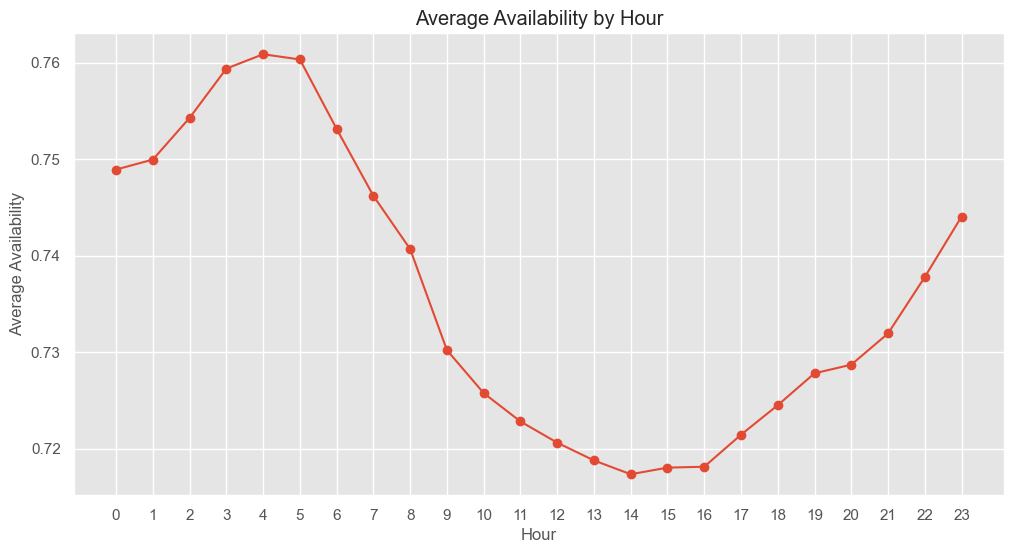

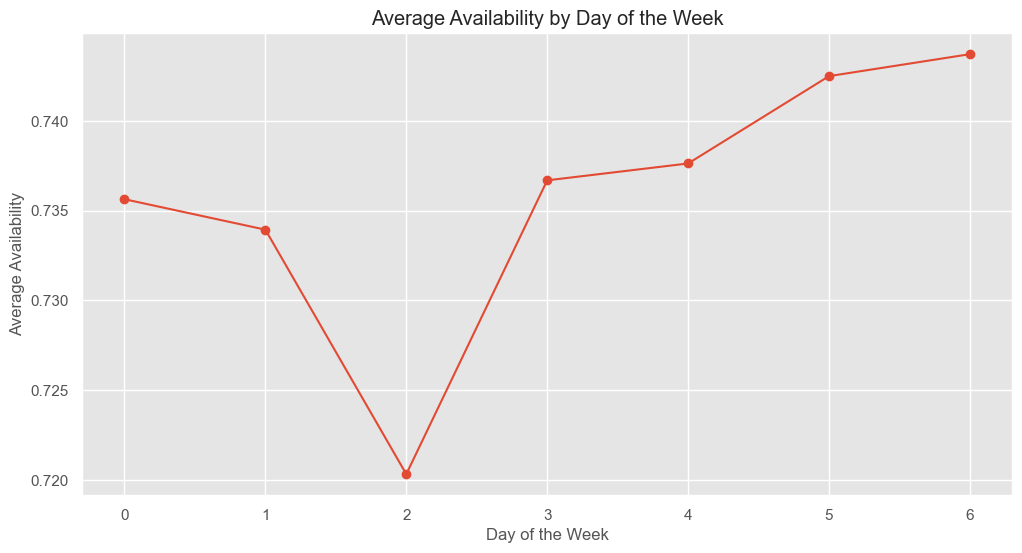

In [14]:


# 按小时绘制可用性变化趋势
plt.figure(figsize=(12, 6))
plt.plot(hourly_availability['hour'], hourly_availability['is_available'], marker='o')
plt.title('Average Availability by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Availability')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

# 按星期几绘制可用性变化趋势
plt.figure(figsize=(12, 6))
plt.plot(weekday_availability['day_of_week'], weekday_availability['is_available'], marker='o')
plt.title('Average Availability by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Availability')
plt.grid(True)
plt.xticks(range(0, 7))
plt.show()


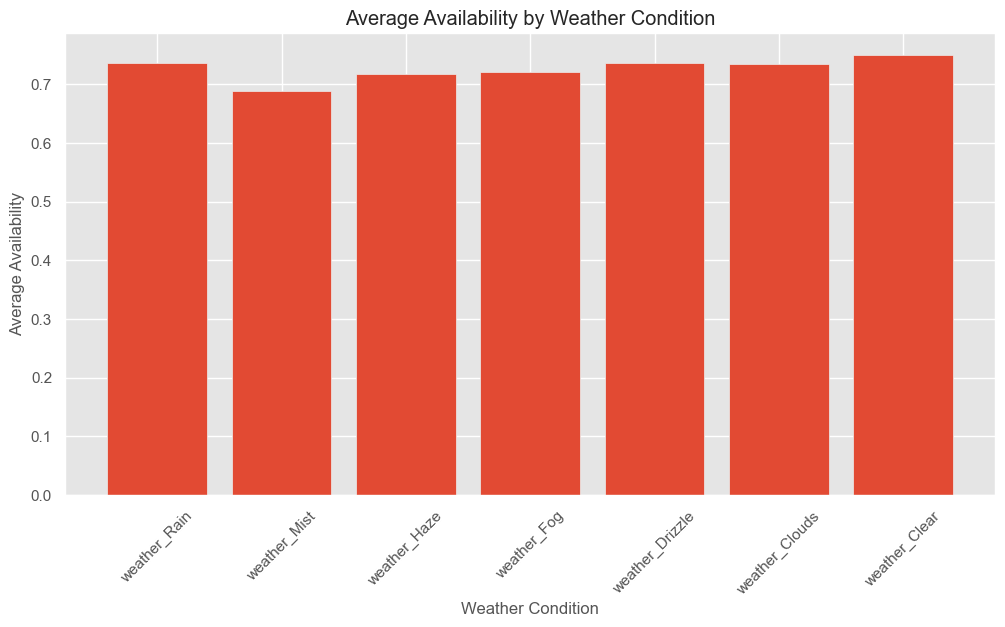

In [15]:


# 按天气条件聚合数据，计算每种天气条件下的平均可用性
weather_columns = ['weather_Clear', 'weather_Clouds', 'weather_Drizzle', 'weather_Fog', 
                   'weather_Haze', 'weather_Mist', 'weather_Rain']

weather_availability = df[weather_columns + ['is_available']].groupby(weather_columns).mean().reset_index()

# 计算每种天气条件的平均可用性
weather_availability['weather_condition'] = weather_availability[weather_columns].idxmax(axis=1)
weather_availability = weather_availability[['weather_condition', 'is_available']]

# 可视化不同天气条件下的可用性变化
plt.figure(figsize=(12, 6))
plt.bar(weather_availability['weather_condition'], weather_availability['is_available'])
plt.title('Average Availability by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Availability')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


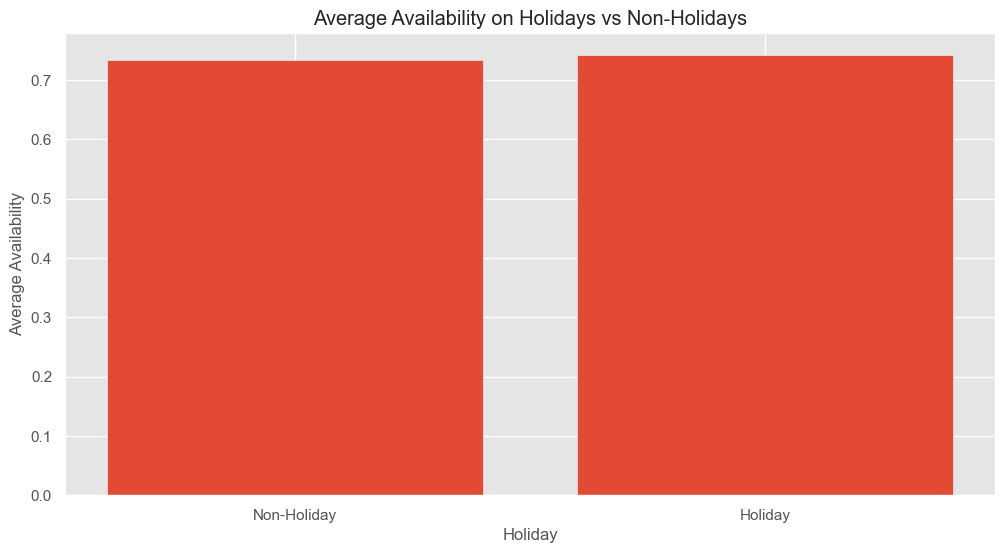

In [16]:
# 按节假日与非节假日聚合数据，计算平均可用性
holiday_availability = df.groupby('is_holiday')['is_available'].mean().reset_index()

# 可视化节假日与非节假日的可用性变化
plt.figure(figsize=(12, 6))
plt.bar(holiday_availability['is_holiday'].map({0: 'Non-Holiday', 1: 'Holiday'}), 
        holiday_availability['is_available'])
plt.title('Average Availability on Holidays vs Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Average Availability')
plt.grid(True)
plt.show()


In [17]:
# 按 station_name 进行分组并计算平均值
station_summary = df.groupby('station_name').agg({
    'is_available': 'mean',
    'city_density_level': 'first',  # 替换 city_station_density 为 city_density_level
}).reset_index()

# 重命名列以更清晰
station_summary.columns = ['station_name', 'avg_availability', 'city_density_level']

# 按平均可用性降序排序
station_summary = station_summary.sort_values('avg_availability', ascending=False)

# 显示结果
print(station_summary)

# 显示一些基本统计信息
print("\n基本统计信息:")
print(station_summary.describe())

# 计算相关系数
print("\n相关系数:")
print(station_summary[['avg_availability', 'city_density_level']].corr())

     station_name  avg_availability  city_density_level
21          50254               1.0                   3
2731        62870               1.0                   3
2642        62224               1.0                   3
1417        53288               1.0                   2
47          50325               1.0                   3
...           ...               ...                 ...
59          50343               0.0                   3
58          50342               0.0                   3
537         51445               0.0                   1
43          50318               0.0                   1
87          50432               0.0                   2

[2775 rows x 3 columns]

基本统计信息:
       avg_availability  city_density_level
count       2775.000000         2775.000000
mean           0.736578            2.420180
std            0.296053            1.005405
min            0.000000            1.000000
25%            0.624939            2.000000
50%            0.862974       

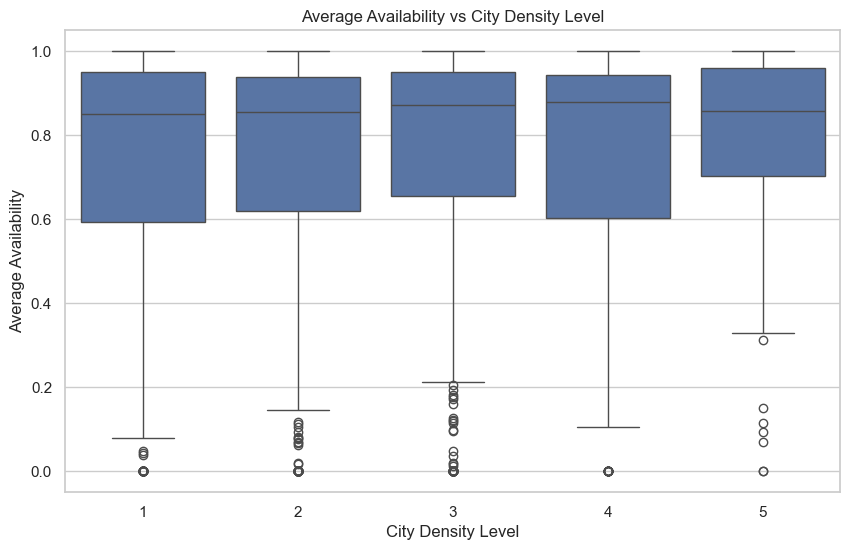

In [18]:


# 设置图表风格
sns.set_theme(style="whitegrid")


# 2. 平均可用性vs城市密度级别的箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='city_density_level', y='avg_availability', data=station_summary)
plt.title('Average Availability vs City Density Level')
plt.xlabel('City Density Level')
plt.ylabel('Average Availability')
plt.show()


     station_name  avg_availability  density_10km  density_1km  density_20km
21          50254               1.0             6            4             7
2731        62870               1.0             7            2            17
2642        62224               1.0           163           10           318
1417        53288               1.0            32           11           103
47          50325               1.0           176            6           350

基本统计信息:
       avg_availability  density_10km  density_1km  density_20km
count       2775.000000   2775.000000  2775.000000   2775.000000
mean           0.736578     90.129369     8.716396    209.025946
std            0.296053     89.483422    11.138018    181.827186
min            0.000000      0.000000     0.000000      0.000000
25%            0.624939     14.000000     2.000000     37.000000
50%            0.862974     66.000000     5.000000    160.000000
75%            0.946984    138.000000    11.000000    332.000000
max      

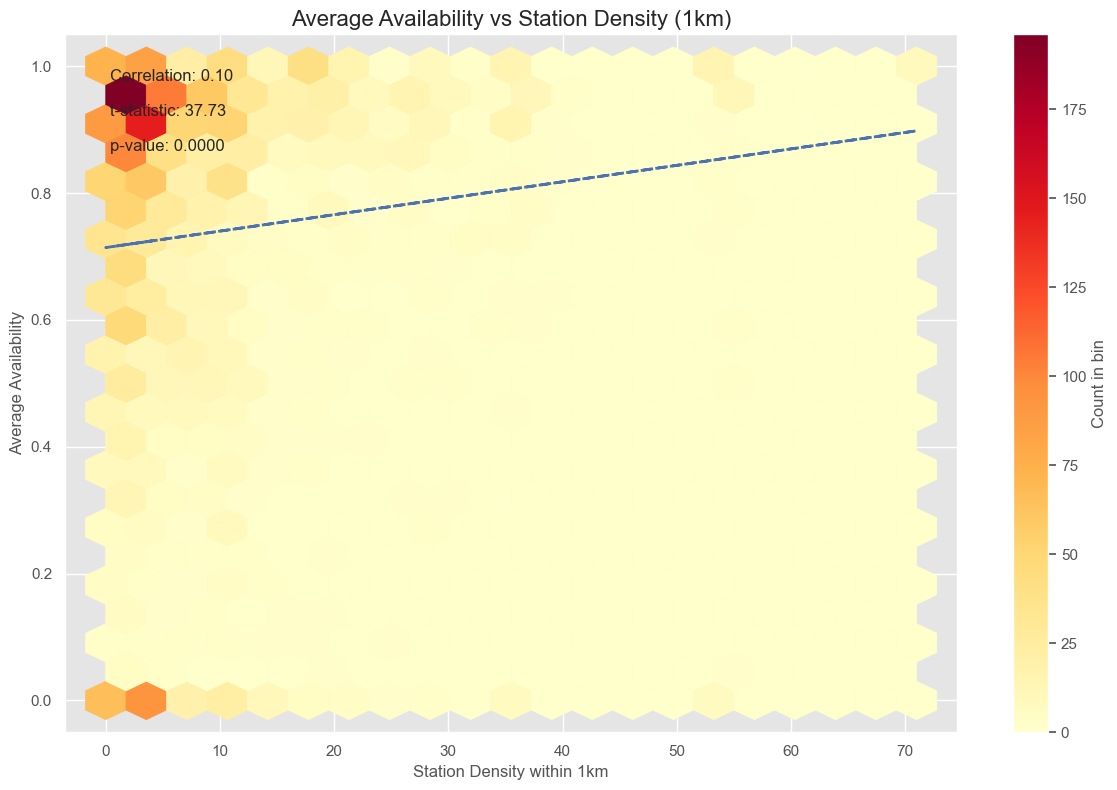

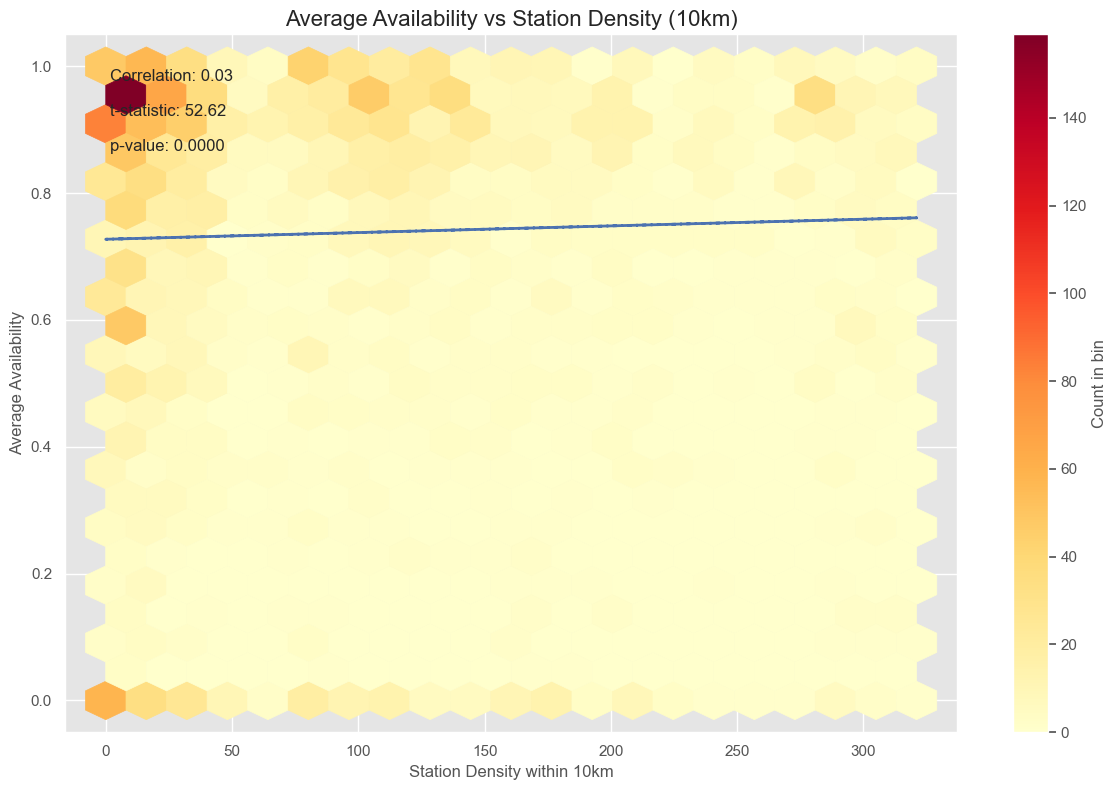

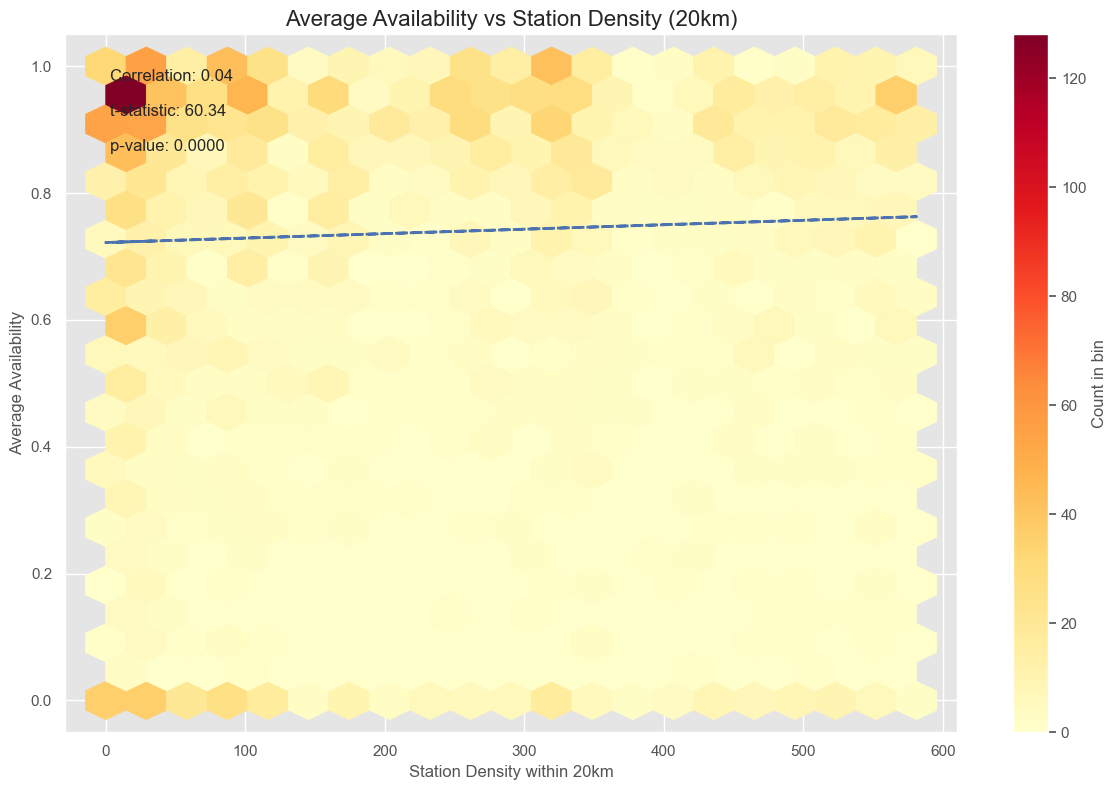

In [19]:


# 按 station_name 进行分组并计算平均值
station_summary = df.groupby('station_name').agg({
    'is_available': 'mean',
    'station_density_10km': 'first',
    'station_density_1km': 'first',
    'station_density_20km': 'first'
}).reset_index()

# 重命名列以更清晰
station_summary.columns = ['station_name', 'avg_availability', 'density_10km', 'density_1km', 'density_20km']

# 按平均可用性降序排序
station_summary = station_summary.sort_values('avg_availability', ascending=False)

# 显示结果
print(station_summary.head())

# 显示一些基本统计信息
print("\n基本统计信息:")
print(station_summary.describe())

# 计算相关系数
print("\n相关系数:")
print(station_summary[['avg_availability', 'density_10km', 'density_1km', 'density_20km']].corr())

# 设置图表风格
plt.style.use('ggplot')

# 创建一个函数来绘制hexbin图和添加统计信息
def plot_hexbin(x, y, xlabel, ylabel, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    hb = ax.hexbin(x, y, gridsize=20, cmap='YlOrRd')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=16)
    
    # 添加颜色条
    cb = plt.colorbar(hb, ax=ax)
    cb.set_label('Count in bin')
    
    # 添加回归线
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), "b--", linewidth=2)
    
    # 计算并显示相关系数
    corr = x.corr(y)
    ax.text(0.05, 0.95, f'Correlation: {corr:.2f}', transform=ax.transAxes, 
             fontsize=12, verticalalignment='top')
    
    # 执行t检验
    t_stat, p_value = stats.ttest_ind(x, y)
    ax.text(0.05, 0.90, f't-statistic: {t_stat:.2f}', transform=ax.transAxes, 
             fontsize=12, verticalalignment='top')
    ax.text(0.05, 0.85, f'p-value: {p_value:.4f}', transform=ax.transAxes, 
             fontsize=12, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# 绘制三个hexbin图
plot_hexbin(station_summary['density_1km'], station_summary['avg_availability'],
            'Station Density within 1km', 'Average Availability',
            'Average Availability vs Station Density (1km)')

plot_hexbin(station_summary['density_10km'], station_summary['avg_availability'],
            'Station Density within 10km', 'Average Availability',
            'Average Availability vs Station Density (10km)')

plot_hexbin(station_summary['density_20km'], station_summary['avg_availability'],
            'Station Density within 20km', 'Average Availability',
            'Average Availability vs Station Density (20km)')

Classification Report:


C:\Users\colin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\colin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\colin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    331658
           1       0.73      1.00      0.85    919460

    accuracy                           0.73   1251118
   macro avg       0.37      0.50      0.42   1251118
weighted avg       0.54      0.73      0.62   1251118

Confusion Matrix:
[[     0 331658]
 [     0 919460]]


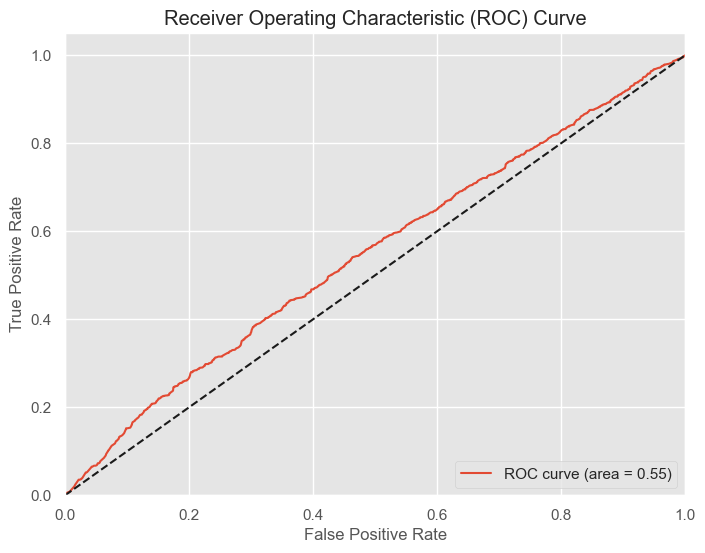

Model Coefficients:
                      Coefficient
city_density_level       0.039967
station_density_1km      0.015195
station_density_10km    -0.001272
station_density_20km     0.000764


In [20]:


density_columns = ['city_density_level', 'station_density_1km', 'station_density_10km', 'station_density_20km']
# 特征和目标变量
X = df[density_columns]
y = df['is_available']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练逻辑回归模型
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# 预测
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# 输出分类报告和混淆矩阵
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC曲线和AUC值
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 模型系数
coefficients = pd.DataFrame(log_reg.coef_.T, index=density_columns, columns=['Coefficient'])
print("Model Coefficients:")
print(coefficients)


In [21]:
# 计算逻辑回归模型的准确性
accuracy = log_reg.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

# 使用假设检验检查不同密度水平间的可用性差异


# 假设测试，检查不同密度水平间的可用性差异
density_level_groups = df.groupby('city_density_level')['is_available'].apply(list)

# 对最高和最低密度水平进行T检验
t_stat, p_val = ttest_ind(density_level_groups[min(density_level_groups.keys())], 
                          density_level_groups[max(density_level_groups.keys())])

print(f'T-statistic: {t_stat}, P-value: {p_val}')



Accuracy: 0.7349106958736107
T-statistic: -61.98166985425469, P-value: 0.0


In [22]:



# 提取每个充电站的最大充电速度和坐标
stations = df[['station_name', 'coordinates_x', 'coordinates_y', 'max_chargerate']].drop_duplicates()

# 查看充电站数据
print(stations.head())


     station_name  coordinates_x  coordinates_y  max_chargerate
0           50035       -4.61764       57.21494               7
2058        50055       -3.18617       55.94840              22
4116        50059       -3.18617       55.94840              22
6174        50141       -3.07473       55.89394               7
8232        50142       -3.15398       55.87975               7


In [23]:


# 将坐标转换为numpy数组
coords = stations[['coordinates_x', 'coordinates_y']].to_numpy()

# 创建BallTree进行空间查询
tree = BallTree(np.deg2rad(coords), metric='haversine')

# 定义查询范围10km，地球半径约为6371km
radius = 10 / 6371.0

# 计算每个充电站10km范围内其他充电站的平均最大充电速率
average_max_chargerate = []

for coord in np.deg2rad(coords):
    # 查询范围内的充电站索引
    idx = tree.query_radius([coord], r=radius)[0]
    # 计算平均最大充电速率
    avg_rate = stations.iloc[idx]['max_chargerate'].mean()
    average_max_chargerate.append(avg_rate)

# 添加平均最大充电速率到充电站数据
stations['avg_max_chargerate_10km'] = average_max_chargerate

# 查看结果
print(stations.head())


     station_name  coordinates_x  coordinates_y  max_chargerate  \
0           50035       -4.61764       57.21494               7   
2058        50055       -3.18617       55.94840              22   
4116        50059       -3.18617       55.94840              22   
6174        50141       -3.07473       55.89394               7   
8232        50142       -3.15398       55.87975               7   

      avg_max_chargerate_10km  
0                    7.000000  
2058                22.072993  
4116                22.072993  
6174                23.933333  
8232                21.386364  


In [24]:
# 将充电站的平均最大充电速率合并到原始数据集中
df = df.merge(stations[['station_name', 'avg_max_chargerate_10km']], on='station_name', how='left')

# 查看合并结果
print(df.head())


   city_id station_name  connector_id  coordinates_x  coordinates_y  \
0       80        50035             1       -4.61764       57.21494   
1       80        50035             1       -4.61764       57.21494   
2       80        50035             1       -4.61764       57.21494   
3       80        50035             1       -4.61764       57.21494   
4       80        50035             1       -4.61764       57.21494   

   tariff_amount  tariff_connectionfee  max_chargerate  is_available  hour  \
0           0.75                   1.5               7             0     1   
1           0.75                   1.5               7             0     2   
2           0.75                   1.5               7             0     3   
3           0.75                   1.5               7             0     4   
4           0.75                   1.5               7             0     5   

   ...  station_connector_count  station_avg_max_chargerate  \
0  ...                        2          

In [25]:
# 分析周围充电站最大速率与可用性的关系
correlation = df[['avg_max_chargerate_10km', 'is_available']].corr()

# 输出相关性
print(correlation)


                         avg_max_chargerate_10km  is_available
avg_max_chargerate_10km                 1.000000     -0.041494
is_available                           -0.041494      1.000000


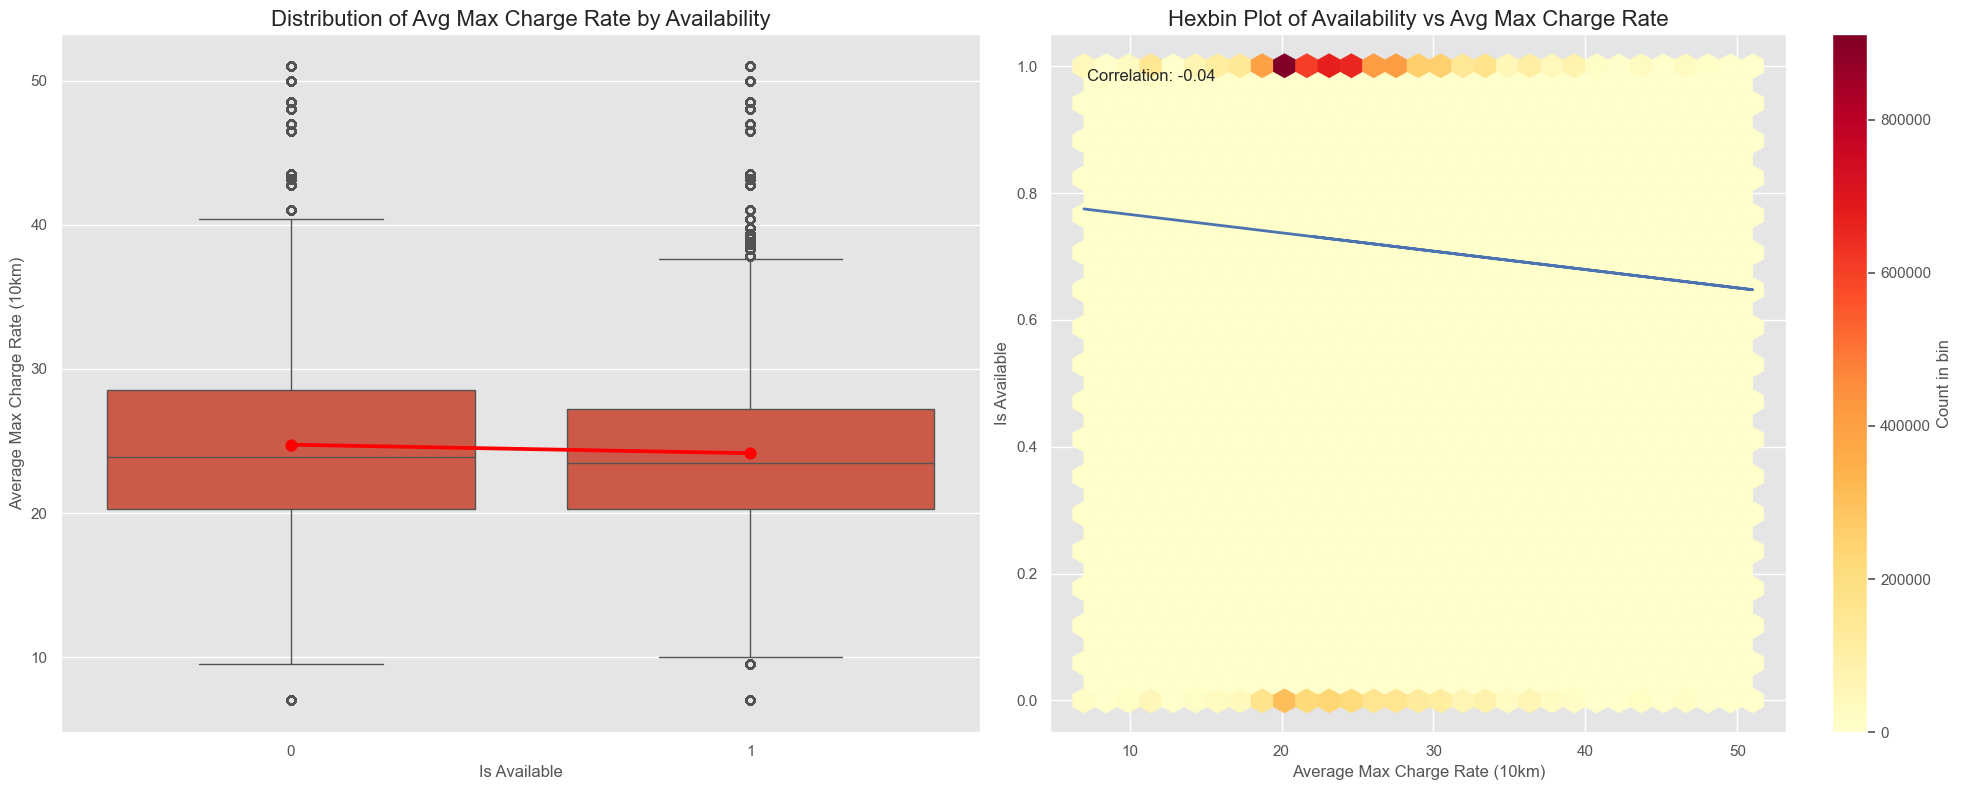

       avg_max_chargerate_10km  is_available
count             8.020023e+06  8.020023e+06
mean              2.431333e+01  7.247457e-01
std               6.400294e+00  4.466424e-01
min               7.000000e+00  0.000000e+00
25%               2.027706e+01  0.000000e+00
50%               2.355556e+01  1.000000e+00
75%               2.757143e+01  1.000000e+00
max               5.100000e+01  1.000000e+00

t-statistic: 117.61113848262319
p-value: 0.0


In [26]:


# 创建一个图形，包含两个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 1. 箱线图
sns.boxplot(x='is_available', y='avg_max_chargerate_10km', data=df, ax=ax1)
ax1.set_title('Distribution of Avg Max Charge Rate by Availability', fontsize=16)
ax1.set_xlabel('Is Available', fontsize=12)
ax1.set_ylabel('Average Max Charge Rate (10km)', fontsize=12)

# 添加均值点
sns.pointplot(x='is_available', y='avg_max_chargerate_10km', data=df, color='red', ax=ax1)

# 2. Hexbin图
hb = ax2.hexbin(df['avg_max_chargerate_10km'], df['is_available'], gridsize=30, cmap='YlOrRd')
ax2.set_title('Hexbin Plot of Availability vs Avg Max Charge Rate', fontsize=16)
ax2.set_xlabel('Average Max Charge Rate (10km)', fontsize=12)
ax2.set_ylabel('Is Available', fontsize=12)

# 添加颜色条
cb = plt.colorbar(hb, ax=ax2)
cb.set_label('Count in bin')

# 添加一条拟合线
z = np.polyfit(df['avg_max_chargerate_10km'], df['is_available'], 1)
p = np.poly1d(z)
ax2.plot(df['avg_max_chargerate_10km'], p(df['avg_max_chargerate_10km']), "b-", linewidth=2)

# 计算并显示相关系数
corr = df['avg_max_chargerate_10km'].corr(df['is_available'])
ax2.text(0.05, 0.95, f'Correlation: {corr:.2f}', transform=ax2.transAxes, 
         fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.show()

# 打印一些统计信息
print(df[['avg_max_chargerate_10km', 'is_available']].describe())

# 执行t检验

t_stat, p_value = stats.ttest_ind(df[df['is_available'] == 0]['avg_max_chargerate_10km'], 
                                  df[df['is_available'] == 1]['avg_max_chargerate_10km'])
print(f"\nt-statistic: {t_stat}")
print(f"p-value: {p_value}")

Classification Report:


C:\Users\colin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\colin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\colin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    441756
           1       0.72      1.00      0.84   1162249

    accuracy                           0.72   1604005
   macro avg       0.36      0.50      0.42   1604005
weighted avg       0.53      0.72      0.61   1604005

Confusion Matrix:
[[      0  441756]
 [      0 1162249]]


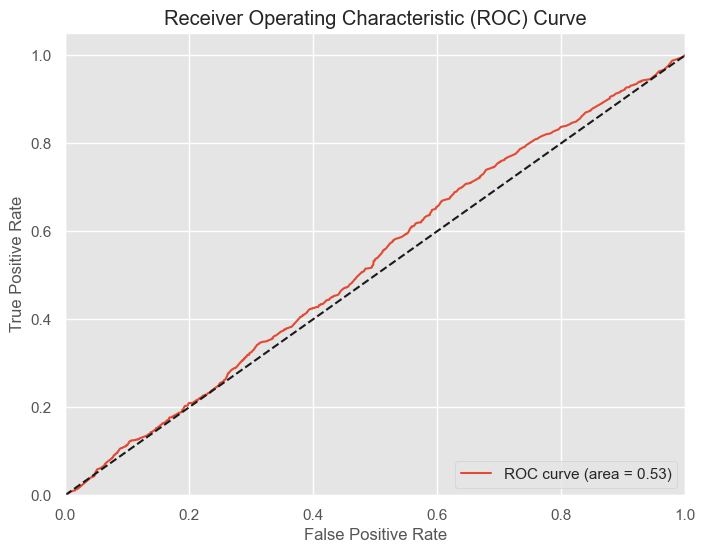

Model Coefficients:
                         Coefficient
avg_max_chargerate_10km    -0.014568


In [27]:


# 特征和目标变量
X = df[['avg_max_chargerate_10km']]
y = df['is_available']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练逻辑回归模型
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# 预测
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# 输出分类报告和混淆矩阵
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC曲线和AUC值
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 模型系数
coefficients = pd.DataFrame(log_reg.coef_.T, index=['avg_max_chargerate_10km'], columns=['Coefficient'])
print("Model Coefficients:")
print(coefficients)


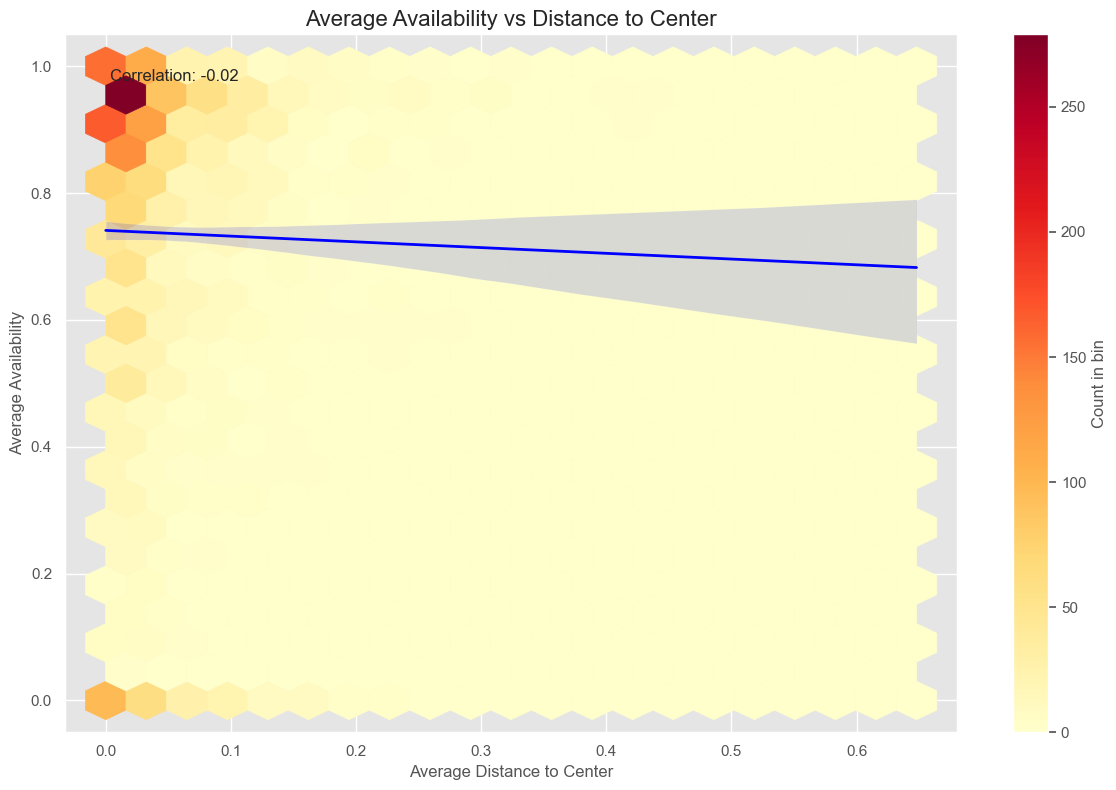

       avg_availability  avg_distance_to_center
count       2775.000000             2775.000000
mean           0.736578                0.049542
std            0.296053                0.068427
min            0.000000                0.000000
25%            0.624939                0.009267
50%            0.862974                0.025216
75%            0.946984                0.064312
max            1.000000                0.647872

t-statistic: 119.10765718250299
p-value: 0.0


In [28]:


# 按station分组并计算平均值
grouped_data = df.groupby('station_name').agg({
    'is_available': 'mean',
    'distance_to_center': 'mean'
}).reset_index()

# 重命名列
grouped_data.columns = ['station_name', 'avg_availability', 'avg_distance_to_center']

# 创建图形
plt.figure(figsize=(12, 8))

# 创建hexbin图
hb = plt.hexbin(grouped_data['avg_distance_to_center'], grouped_data['avg_availability'], 
                gridsize=20, cmap='YlOrRd')

# 添加颜色条
cb = plt.colorbar(hb)
cb.set_label('Count in bin')

# 添加趋势线
sns.regplot(data=grouped_data, x='avg_distance_to_center', y='avg_availability', 
            scatter=False, color='blue', line_kws={'linewidth': 2})

# 设置标题和标签
plt.title('Average Availability vs Distance to Center', fontsize=16)
plt.xlabel('Average Distance to Center', fontsize=12)
plt.ylabel('Average Availability', fontsize=12)

# 计算相关系数
correlation = grouped_data['avg_availability'].corr(grouped_data['avg_distance_to_center'])

# 添加相关系数文本
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top')

# 显示图表
plt.tight_layout()
plt.show()

# 打印一些统计信息
print(grouped_data.describe())

# 执行t检验
t_stat, p_value = stats.ttest_ind(grouped_data['avg_availability'], grouped_data['avg_distance_to_center'])
print(f"\nt-statistic: {t_stat}")
print(f"p-value: {p_value}")